In [29]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
import seaborn as sns
from scipy.stats import chi2_contingency


In [30]:
# df = pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/GDP_Country1.csv ')
data = pd.read_csv('GDP_Country1.csv')

In [31]:
data

,Country,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [32]:
data1=data.set_index('Country')
data1.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [33]:
data1.isnull().sum()/len(data1)

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         0.013216
Infant mortality (per 1000 births)    0.013216
GDP ($ per capita)                    0.004405
Literacy (%)                          0.079295
Phones (per 1000)                     0.017621
Arable (%)                            0.008811
Crops (%)                             0.008811
Other (%)                             0.008811
Climate                               0.096916
Birthrate                             0.013216
Deathrate                             0.017621
Agriculture                           0.066079
Industry                              0.070485
Service                               0.066079
dtype: float64

In [34]:
from sklearn.impute import KNNImputer 


In [35]:
# KNN WORKS ONLY ON NUMERIC DATA
data1=data.set_index('Country') 
from sklearn.impute import KNNImputer
impu=KNNImputer() 
data2=impu.fit_transform(data1) 
# knn will change to numpy array so we are converting back to datafram
data2=pd.DataFrame(data2,columns=data1.columns,index=data1.index) 

In [36]:
data2.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.2400,0.3800
Albania,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.1880,0.5790
Algeria,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.6000,0.2980
American Samoa,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1194,0.2110,0.6698
Andorra,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0518,0.2222,0.7262


In [37]:
data2.isnull().sum()/len(data1)

Population                            0.0
Area_sqm                              0.0
Pop_Density_per sqm                   0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

In [38]:
# linear reg is very sensitive to outliers

In [39]:
# outlier treatment
# capping moves all the points to 0.999 percentile which is jus before Q3

In [40]:
# outlier treatment is must for linear reg and gaussian algorithm

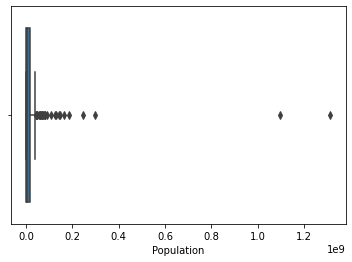

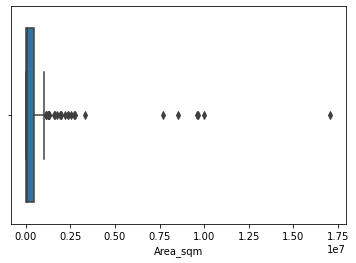

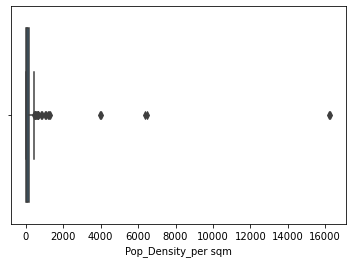

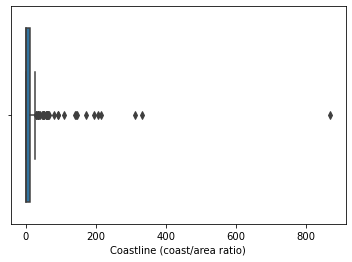

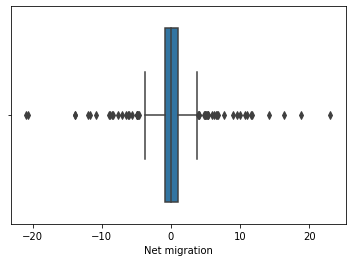

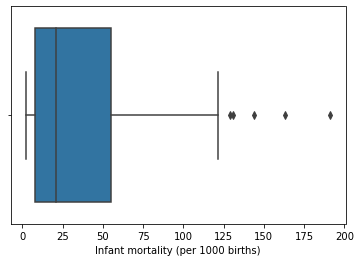

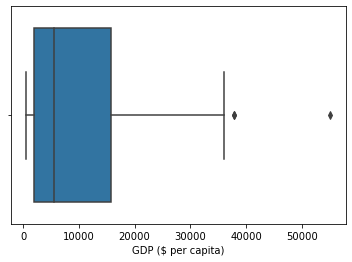

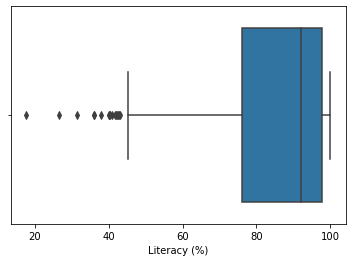

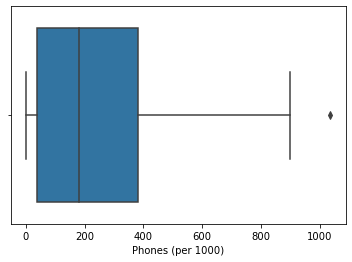

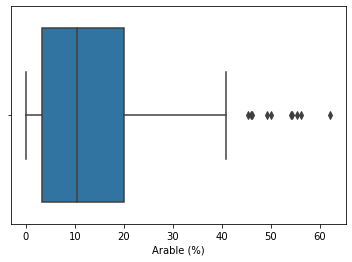

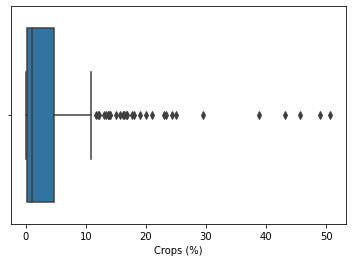

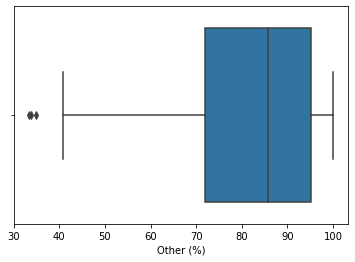

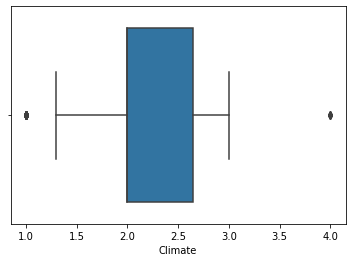

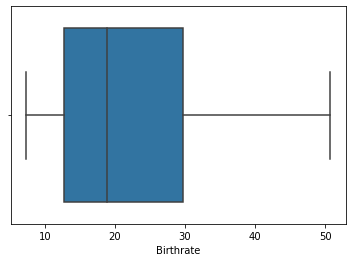

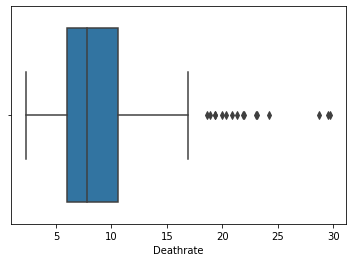

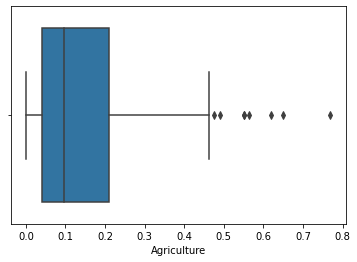

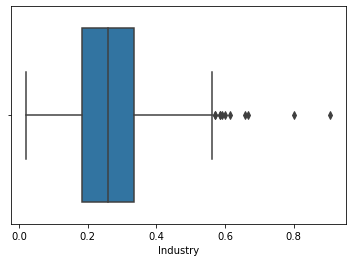

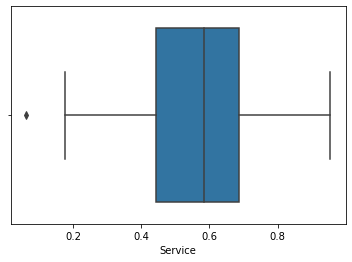

In [41]:
for i in data2.columns:
    sns.boxplot(data2[i])
    plt.show()

In [42]:
#Outlier Treatment
#Capping the outliers #Winsorization
for i in data2.columns:
    q1=data2[i].quantile(0.25)
    q3=data2[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=data2[i].quantile(0.99)
    lc=data2[i].quantile(0.01)
    for ind1 in data2[i].index:
        if data2.loc[ind1, i] >ub:            
            data2.loc[ind1, i] =uc
        if data2.loc[ind1, i] < lb:
            data2.loc[ind1, i] =lc

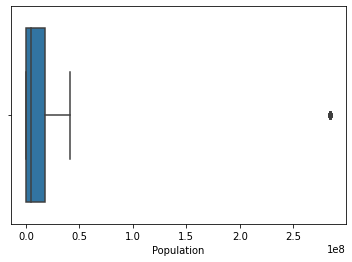

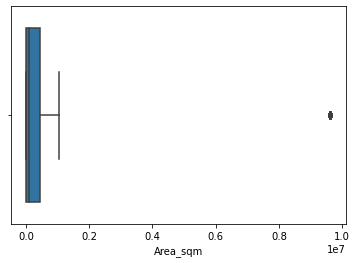

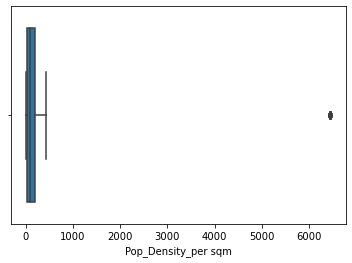

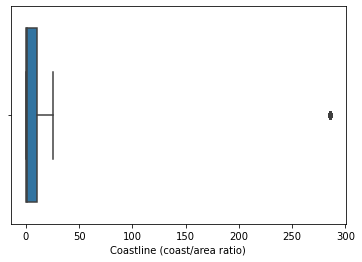

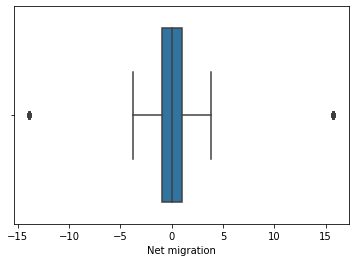

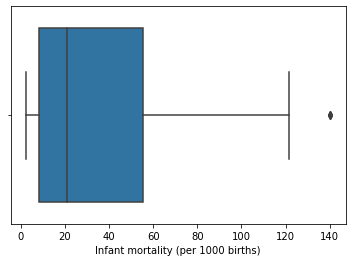

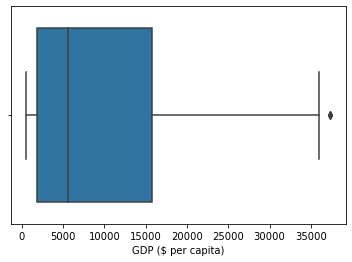

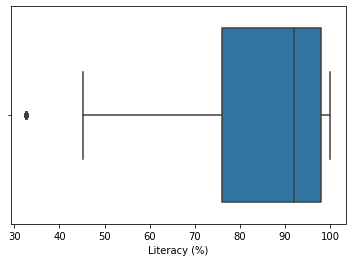

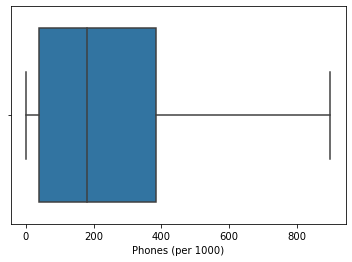

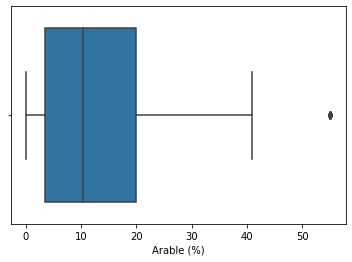

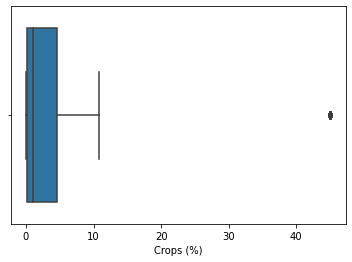

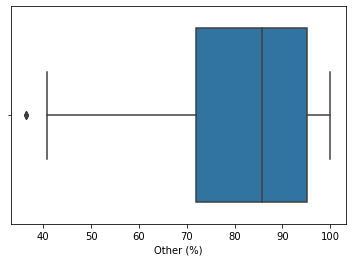

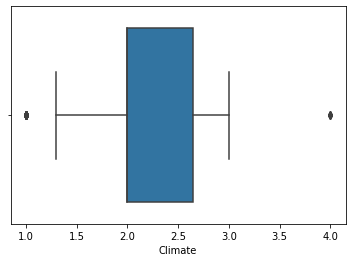

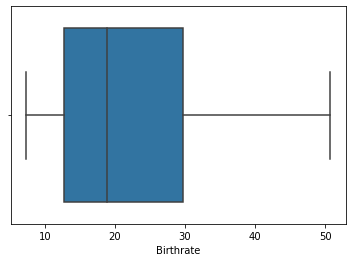

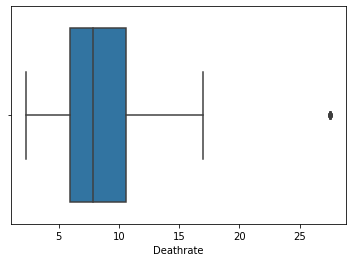

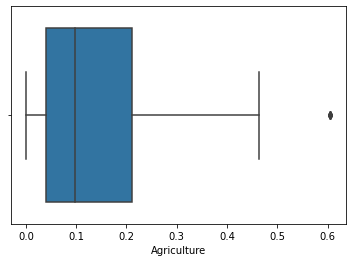

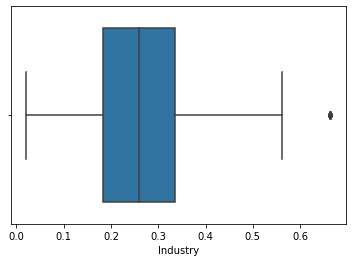

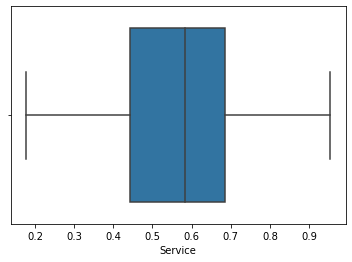

In [43]:
for i in data2.columns:
    sns.boxplot(data2[i])
    plt.show()

In [44]:
out = data2['GDP ($ per capita)']
inp = data2.drop('GDP ($ per capita)', axis  = 1)

In [45]:
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.40e-63
Time:                        14:24:59   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8642.6765   1.21e+04      0.715      0.475   -1.52e+04    3.25e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     6.21e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# r square is 0.80 meaning 80% of variance is explained by the model
# prob(f stat) < 0.05 indicating model is significant


# what is net migration effect on gdp

# Answer = for every 1 unit increase in net migration GDP increases by 295 units

In [46]:
pvals = ols_mod.pvalues
pvals[ols_mod.pvalues < 0.5]

const                                 4.753320e-01
Coastline (coast/area ratio)          1.170419e-04
Net migration                         8.195876e-10
Infant mortality (per 1000 births)    1.645233e-01
Phones (per 1000)                     7.879399e-30
Arable (%)                            2.985243e-01
Deathrate                             1.218267e-01
dtype: float64

In [47]:
# now calculating VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [48]:
v = pd.DataFrame()
v['variables'] = inp.columns
v['VIF'] = [vif(inp.values,i) for i in range(inp.shape[1])]
v

,variables,VIF
0,Population,1.695304
1,Area_sqm,1.663152
2,Pop_Density_per sqm,1.512979
3,Coastline (coast/area ratio),2.206022
4,Net migration,1.206818
5,Infant mortality (per 1000 births),19.449037
6,Literacy (%),45.356119
7,Phones (per 1000),6.845644
8,Arable (%),14.511825
9,Crops (%),3.790156


In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns,index=inp.index)

In [50]:
inp_sc

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,-0.115094,-0.220266,-0.347864,-0.470180,2.143829,3.079871,-2.537552,-1.041107,-0.132135,-0.502354,0.375437,-1.694570,2.210162,3.055247,1.612835,-0.263552,-1.201003
Albania,-0.414949,-0.418770,-0.306272,-0.458127,-1.993115,-0.393970,0.181254,-0.736564,0.539398,-0.218337,-0.449624,1.260999,-0.631504,-0.738826,0.583345,-0.645495,0.014199
Algeria,-0.094652,2.659029,-0.366433,-0.469797,-0.107041,-0.116716,-0.650571,-0.705662,-0.799921,-0.500325,0.932166,-1.694570,-0.448316,-0.842529,-0.327892,2.850162,-1.701740
American Samoa,-0.453407,-0.427929,-0.216248,2.263057,-1.993115,-0.752237,0.710596,0.106750,-0.291774,2.527233,-0.417649,-0.216785,0.031762,-1.070336,-0.199902,-0.476559,0.568673
Andorra,-0.453260,-0.427843,-0.291340,-0.470180,2.143829,-0.904902,0.861837,1.171305,-0.874869,-0.517231,1.010534,1.260999,-1.209041,-0.563721,-0.670128,-0.394294,0.913082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,-0.427185,-0.426113,-0.145933,-0.470180,0.363187,-0.449538,-0.234154,-0.405151,0.225366,2.527233,-1.099140,1.260999,0.862875,-0.959833,-0.404408,0.030250,0.325633
Western Sahara,-0.451058,-0.342656,-0.373383,-0.466162,-0.057088,-0.600098,0.468611,0.248631,-1.039754,-0.517231,1.148462,-1.694570,-0.207014,-0.596702,-0.231899,-0.901103,-1.078872
Yemen,-0.219874,-0.258613,-0.351882,-0.466736,-0.052623,0.775295,-1.648760,-0.888836,-0.832898,-0.501002,0.960378,-1.694570,1.875371,-0.215210,-0.091388,1.440500,-1.121618


In [51]:
# scaler is same as z score where z = x-x.mean()/x.std
# SCALER - dont use cos it will show right values but all in z standard format 
# so use x-x.mean() which is the numerator part alone

In [52]:
#Standard Scaler = x-x.mean() / x.std()
inp1=inp-inp.mean()
inpc=sm.add_constant(inp1)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.40e-63
Time:                        14:24:59   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     4.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
v1=pd.DataFrame()
v1['variables']=inp1.columns
v1['VIF'] = [vif(inp1.values,i) for i in range(inp1.shape[1])]

In [54]:
v1

,variables,VIF
0,Population,1.414517
1,Area_sqm,1.424810
2,Pop_Density_per sqm,1.336890
3,Coastline (coast/area ratio),1.808579
4,Net migration,1.204191
5,Infant mortality (per 1000 births),9.500994
6,Literacy (%),2.764233
7,Phones (per 1000),3.238427
8,Arable (%),10.506242
9,Crops (%),3.830876


In [55]:
v1.sort_values('VIF',ascending=False)

,variables,VIF
16,Service,25.532397
14,Agriculture,20.026042
15,Industry,16.545912
10,Other (%),14.145739
8,Arable (%),10.506242
5,Infant mortality (per 1000 births),9.500994
12,Birthrate,6.134302
9,Crops (%),3.830876
7,Phones (per 1000),3.238427
6,Literacy (%),2.764233
